In [15]:
import string, re, nltk
import os
from os import listdir
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.utils import plot_model
from keras.models import Sequential
from keras.layers import Dense, Embedding
import numpy as np
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
from keras.preprocessing.sequence import pad_sequences


In [17]:
path = '/content/drive/MyDrive/txt_sentoken'

In [18]:
# load doc into memory
def load_doc(filename):
  # open the file as read only
  file = open(filename, 'r')
  # read all text
  text = file.read()
  # close the file
  file.close()
  return text

In [19]:
load_doc(os.path.join(path, 'neg/cv000_29416.txt'))

'plot : two teen couples go to a church party , drink and then drive . \nthey get into an accident . \none of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . \nwhat\'s the deal ? \nwatch the movie and " sorta " find out . . . \ncritique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . \nwhich is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn\'t snag this one correctly . \nthey seem to have taken this pretty neat concept , but executed it terribly . \nso what are the problems with the movie ? \nwell , its main problem is that it\'s simply too jumbled . \nit starts off " normal " but then downshifts into this " fantasy " world in which you , as an audience membe

In [20]:
load_doc('/content/drive/MyDrive/txt_sentoken/neg/cv000_29416.txt')

'plot : two teen couples go to a church party , drink and then drive . \nthey get into an accident . \none of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . \nwhat\'s the deal ? \nwatch the movie and " sorta " find out . . . \ncritique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . \nwhich is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn\'t snag this one correctly . \nthey seem to have taken this pretty neat concept , but executed it terribly . \nso what are the problems with the movie ? \nwell , its main problem is that it\'s simply too jumbled . \nit starts off " normal " but then downshifts into this " fantasy " world in which you , as an audience membe

In [21]:
# turn a doc into clean tokens
def clean_doc(doc):
  #split into tokens by white space
  tokens = doc.split()
  # prepare regex for char filtering
  re_punc = re.compile('[%s]' % re.escape(string.punctuation))
  # remove punctuation from each word
  tokens= [re_punc.sub('',w) for w in tokens]
  # remocve remaining tokens that are not alphabetic
  tokens= [word for word in tokens if word.isalpha()]
  # filter out stop words
  sowrds= set(stopwords.words('english'))
  tokens= [w for w  in tokens if not w in sowrds]
  # filter out short tokens
  tokens= [word for word in tokens if len(word) >1]
  return tokens

In [22]:
' '.join(clean_doc(load_doc('/content/drive/MyDrive/txt_sentoken/neg/cv000_29416.txt')))

'plot two teen couples go church party drink drive get accident one guys dies girlfriend continues see life nightmares whats deal watch movie sorta find critique mindfuck movie teen generation touches cool idea presents bad package makes review even harder one write since generally applaud films attempt break mold mess head lost highway memento good bad ways making types films folks didnt snag one correctly seem taken pretty neat concept executed terribly problems movie well main problem simply jumbled starts normal downshifts fantasy world audience member idea whats going dreams characters coming back dead others look like dead strange apparitions disappearances looooot chase scenes tons weird things happen simply explained personally dont mind trying unravel film every give clue get kind fed films biggest problem obviously got big secret hide seems want hide completely final five minutes make things entertaining thrilling even engaging meantime really sad part arrow dig flicks like a

In [23]:
# load doc, clean and return line of tokens
def doc_to_line(filename, vocab):
  # load the doc
  doc = load_doc(filename)
  # clean doc
  tokens = clean_doc(doc)
  # filter by vocab
  tokens = [w for w in tokens if w in vocab]
  return ' '.join(tokens)

In [24]:
vocab = load_doc('/content/drive/MyDrive/vocab.txt')
print(vocab)

sometimes
tip
hat
film
jump
bandwagon
enjoy
ride
saw
truman
show
audience
full
teenagers
doubt
drawn
ace
ventura
hoping
see
latest
take
fart
jokes
surprised
may
realized
picture
actually
something
say
crowd
id
cant
tell
yet
really
good
seems
comparison
awful
mountain
crap
spewed
forth
bowls
hollywood
far
year
time
alone
make
call
end
burbanks
side
concerned
wanted
win
felt
tribute
jim
carrey
achieved
legitimacy
last
best
viewed
cold
little
possible
plot
unless
youre
media
blackout
however
probably
know
basics
stars
burbank
everyman
insurance
agent
living
beautiful
wife
meryl
laura
linney
south
florida
island
town
seahaven
looks
like
michael
idea
perfect
american
small
would
seem
live
middle
class
lifestyle
complete
working
bud
friendly
neighbors
interesting
coworkers
tragedy
past
father
drowned
horrible
boating
accident
leaving
dreadful
fear
water
travel
general
overall
life
one
day
leaves
house
work
light
falls
magically
sky
curious
event
lead
discover
rest
world
already
knows
prisone

In [25]:
listdir('/content/drive/MyDrive/txt_sentoken/neg')

['cv006_17022.txt',
 'cv007_4992.txt',
 'cv047_18725.txt',
 'cv056_14663.txt',
 'cv062_24556.txt',
 'cv023_13847.txt',
 'cv055_8926.txt',
 'cv037_19798.txt',
 'cv036_18385.txt',
 'cv010_29063.txt',
 'cv059_28723.txt',
 'cv030_22893.txt',
 'cv024_7033.txt',
 'cv001_19502.txt',
 'cv029_19943.txt',
 'cv022_14227.txt',
 'cv016_4348.txt',
 'cv020_9234.txt',
 'cv032_23718.txt',
 'cv044_18429.txt',
 'cv008_29326.txt',
 'cv003_12683.txt',
 'cv052_29318.txt',
 'cv060_11754.txt',
 'cv051_10751.txt',
 'cv038_9781.txt',
 'cv002_17424.txt',
 'cv028_26964.txt',
 'cv063_28852.txt',
 'cv015_29356.txt',
 'cv026_29229.txt',
 'cv027_26270.txt',
 'cv019_16117.txt',
 'cv025_29825.txt',
 'cv039_5963.txt',
 'cv053_23117.txt',
 'cv057_7962.txt',
 'cv034_29446.txt',
 'cv005_29357.txt',
 'cv033_25680.txt',
 'cv054_4101.txt',
 'cv040_8829.txt',
 'cv004_12641.txt',
 'cv046_10613.txt',
 'cv045_25077.txt',
 'cv050_12128.txt',
 'cv009_29417.txt',
 'cv000_29416.txt',
 'cv017_23487.txt',
 'cv049_21917.txt',
 'cv061_93

In [26]:
# load all docs in a directory
def process_train (directory, vocab):
  documents = list()
  for filename in listdir(directory):
    if not filename.startswith('cv9'):
      path = os.path.join(directory + '/' + filename)
      doc = load_doc(path)
      tokens = clean_doc(doc)
      documents.append(tokens)
  return documents

def process_test (directory, vocab):
  documents = list()
  for filename in listdir(directory):
    if filename.startswith('cv9'):
      path = os.path.join(directory + '/' + filename)
      doc = load_doc(path)
      tokens = clean_doc(doc)
      documents.append(tokens)
  return documents


In [27]:
process_test('/content/drive/MyDrive/txt_sentoken/neg', vocab)

[['crown',
  'jewel',
  'irwin',
  'allen',
  'disaster',
  'movies',
  'poseidon',
  'adventure',
  'features',
  'allstar',
  'cast',
  'including',
  'gene',
  'hackman',
  'ernest',
  'borgnine',
  'spouting',
  'laughable',
  'dramatic',
  'dialogue',
  'movie',
  'history',
  'trapped',
  'cruise',
  'ship',
  'story',
  'begins',
  'poseidons',
  'big',
  'new',
  'years',
  'cruise',
  'introduced',
  'ensemble',
  'people',
  'soon',
  'passengers',
  'left',
  'alive',
  'lets',
  'see',
  'theres',
  'new',
  'age',
  'preacher',
  'hackman',
  'advises',
  'people',
  'pray',
  'part',
  'god',
  'within',
  'theres',
  'excop',
  'borgnine',
  'busted',
  'hooker',
  'stella',
  'stevens',
  'six',
  'times',
  'married',
  'theres',
  'hippie',
  'singer',
  'theres',
  'got',
  'morning',
  'turns',
  'company',
  'lonely',
  'man',
  'red',
  'buttons',
  'brother',
  'killed',
  'round',
  'group',
  'elderly',
  'couple',
  'jack',
  'albertson',
  'shelley',
  'winte

In [28]:
# load all docs in a directory
def process_docs(directory, is_train):
  documents = list()
  # walk through all files in the folder
  for filename in listdir(directory):
    # skip any reviews in the test set
    if is_train and filename.startswith('cv9'):
      continue
    if not is_train and not filename.startswith('cv9'):
      continue
    # create the full path of the file to open
    path = os.path.join(directory + '/'+ filename)
    # load the doc
    doc= load_doc(path)
    #clean doc
    tokens = clean_doc(doc)
    # add to list
    documents.append(tokens)
  return documents

In [29]:
process_docs('/content/drive/MyDrive/txt_sentoken/neg', True) # training data created

Output hidden; open in https://colab.research.google.com to view.

In [30]:
process_docs('/content/drive/MyDrive/txt_sentoken/neg', False) # testing data created

[['crown',
  'jewel',
  'irwin',
  'allen',
  'disaster',
  'movies',
  'poseidon',
  'adventure',
  'features',
  'allstar',
  'cast',
  'including',
  'gene',
  'hackman',
  'ernest',
  'borgnine',
  'spouting',
  'laughable',
  'dramatic',
  'dialogue',
  'movie',
  'history',
  'trapped',
  'cruise',
  'ship',
  'story',
  'begins',
  'poseidons',
  'big',
  'new',
  'years',
  'cruise',
  'introduced',
  'ensemble',
  'people',
  'soon',
  'passengers',
  'left',
  'alive',
  'lets',
  'see',
  'theres',
  'new',
  'age',
  'preacher',
  'hackman',
  'advises',
  'people',
  'pray',
  'part',
  'god',
  'within',
  'theres',
  'excop',
  'borgnine',
  'busted',
  'hooker',
  'stella',
  'stevens',
  'six',
  'times',
  'married',
  'theres',
  'hippie',
  'singer',
  'theres',
  'got',
  'morning',
  'turns',
  'company',
  'lonely',
  'man',
  'red',
  'buttons',
  'brother',
  'killed',
  'round',
  'group',
  'elderly',
  'couple',
  'jack',
  'albertson',
  'shelley',
  'winte

In [31]:
# load and clean a dataset
def load_clean_dataset(is_train):
  # load documents
  neg= process_docs('/content/drive/MyDrive/txt_sentoken/neg', is_train)
  pos= process_docs('/content/drive/MyDrive/txt_sentoken/pos', is_train)
  docs = neg + pos
  # prepare labels
  labels =[0 for _ in range(len(neg))] + [1 for _ in range(len(pos))]
  return docs, labels

In [32]:
train, train_labels = load_clean_dataset(True)
test, test_labels = load_clean_dataset(False)

In [33]:
len(train), len(train_labels), len(test), len(test_labels)

(1810, 1810, 200, 200)

In [34]:
from collections import Counter
Counter(train_labels)

Counter({0: 910, 1: 900})

In [35]:
Counter(test_labels)

Counter({0: 100, 1: 100})

### Preprocessing of Text

In [36]:
# fit a tokenizer
def create_tokenizer(lines):
  tokenizer = Tokenizer()
  tokenizer.fit_on_texts(lines)
  return tokenizer

In [89]:
# create the tokenizer
tokenizer = create_tokenizer(train) # create_tokenizer is like fit_tranform, so only applied on training not on testing

In [38]:
# encode data
x_train = tokenizer.texts_to_matrix(train)

In [39]:
x_train.shape

(1810, 44277)

In [40]:
len(tokenizer.word_docs)

44276

In [41]:
tokenizer.word_index

{'film': 1,
 'one': 2,
 'movie': 3,
 'like': 4,
 'even': 5,
 'good': 6,
 'time': 7,
 'story': 8,
 'films': 9,
 'would': 10,
 'much': 11,
 'also': 12,
 'characters': 13,
 'get': 14,
 'character': 15,
 'two': 16,
 'first': 17,
 'see': 18,
 'way': 19,
 'well': 20,
 'make': 21,
 'really': 22,
 'little': 23,
 'life': 24,
 'plot': 25,
 'people': 26,
 'bad': 27,
 'scene': 28,
 'could': 29,
 'movies': 30,
 'never': 31,
 'best': 32,
 'new': 33,
 'scenes': 34,
 'man': 35,
 'many': 36,
 'doesnt': 37,
 'know': 38,
 'dont': 39,
 'hes': 40,
 'great': 41,
 'another': 42,
 'action': 43,
 'love': 44,
 'us': 45,
 'go': 46,
 'director': 47,
 'something': 48,
 'end': 49,
 'still': 50,
 'seems': 51,
 'back': 52,
 'made': 53,
 'theres': 54,
 'work': 55,
 'makes': 56,
 'however': 57,
 'world': 58,
 'years': 59,
 'big': 60,
 'every': 61,
 'though': 62,
 'better': 63,
 'enough': 64,
 'around': 65,
 'seen': 66,
 'take': 67,
 'performance': 68,
 'real': 69,
 'role': 70,
 'going': 71,
 'gets': 72,
 'think': 73,
 

In [42]:
# encode data
x_test= tokenizer.texts_to_matrix(test)

In [43]:
x_test.shape

(200, 44277)

In [53]:
 def encode_docs(tokenizer, max_length, docs):
  #integer encode
  encoded = tokenizer.texts_to_sequences(docs)
  #pad sequences
  padded = pad_sequences(encoded, maxlen = max_length, padding ='post')
  return padded

Build the model

In [60]:
import tensorflow as tf

In [69]:
# define the model
def define_model(vocab_size, max_length):#mAX length of individual review
  # define network
  model = Sequential()
  model.add(tf.keras.layers.Embedding(vocab_size, 100, input_length = max_length)) #100: The dimensionality of the embedding space.
  model.add(tf.keras.layers.Conv1D(filters = 32, kernel_size = 8, activation = 'relu'))
  model.add(tf.keras.layers.MaxPooling1D(pool_size = 2))
  model.add(tf.keras.layers.Flatten())
  model.add(Dense(10, activation = 'relu'))
  model.add(Dense(1, activation = 'sigmoid'))
  # compile network
  model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics =['accuracy'])
  return model

In [70]:
# load all the reviews
train_docs, ytrain = load_clean_dataset(True)
test_docs, ytest = load_clean_dataset(False)

In [63]:
len(train_docs), len(ytrain), len(test_docs), len(ytest)

(1810, 1810, 200, 200)

In [64]:
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary size: %d ' % vocab_size)

Vocabulary size: 44277 


In [65]:
# calculate the maximum sequence length
max_length = max([len(s) for s in train_docs]) # so that we can make data structural i.e padding
print('Maximum length: %d' % max_length)

Maximum length: 1380


In [66]:
# encode data
Xtrain = encode_docs(tokenizer, max_length, train_docs)
Xtest = encode_docs(tokenizer, max_length, test_docs)

In [67]:
Xtrain.shape, Xtest.shape, Xtrain

((1810, 1380),
 (200, 1380),
 array([[  818,  1971, 25868, ...,     0,     0,     0],
        [   89,   334,    97, ...,     0,     0,     0],
        [ 2228,   152,     3, ...,     0,     0,     0],
        ...,
        [10024,  8535, 13460, ...,     0,     0,     0],
        [  637,  9934,  2368, ...,     0,     0,     0],
        [ 1556,   125,  2444, ...,     0,     0,     0]], dtype=int32))

In [71]:
model= define_model(vocab_size, max_length)

In [72]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


In TensorFlow/Keras, the build method is used to explicitly create the model's layers and compute their shapes. This step is usually implicit when you call a method like fit, evaluate, or predict because those methods internally finalize the model's architecture by inferring input shapes based on the data.

Why is `model.build()` Needed Here?
If you're calling certain methods (like accessing model attributes) before fitting the model or running any data through it, you may need to explicitly build the model. This is particularly relevant when:

You're inspecting or modifying the model's layers (e.g., `model.summary()`) without having passed any input data.
The model's architecture needs to be finalized because certain operations depend on the input shape being known.


build Explained:
`model.build(input_shape)`:
input_shape specifies the shape of the input data that the model will process.
This is necessary if you want to set up the model's weights and connections without providing actual data.

In [77]:
model.build((None, max_length))

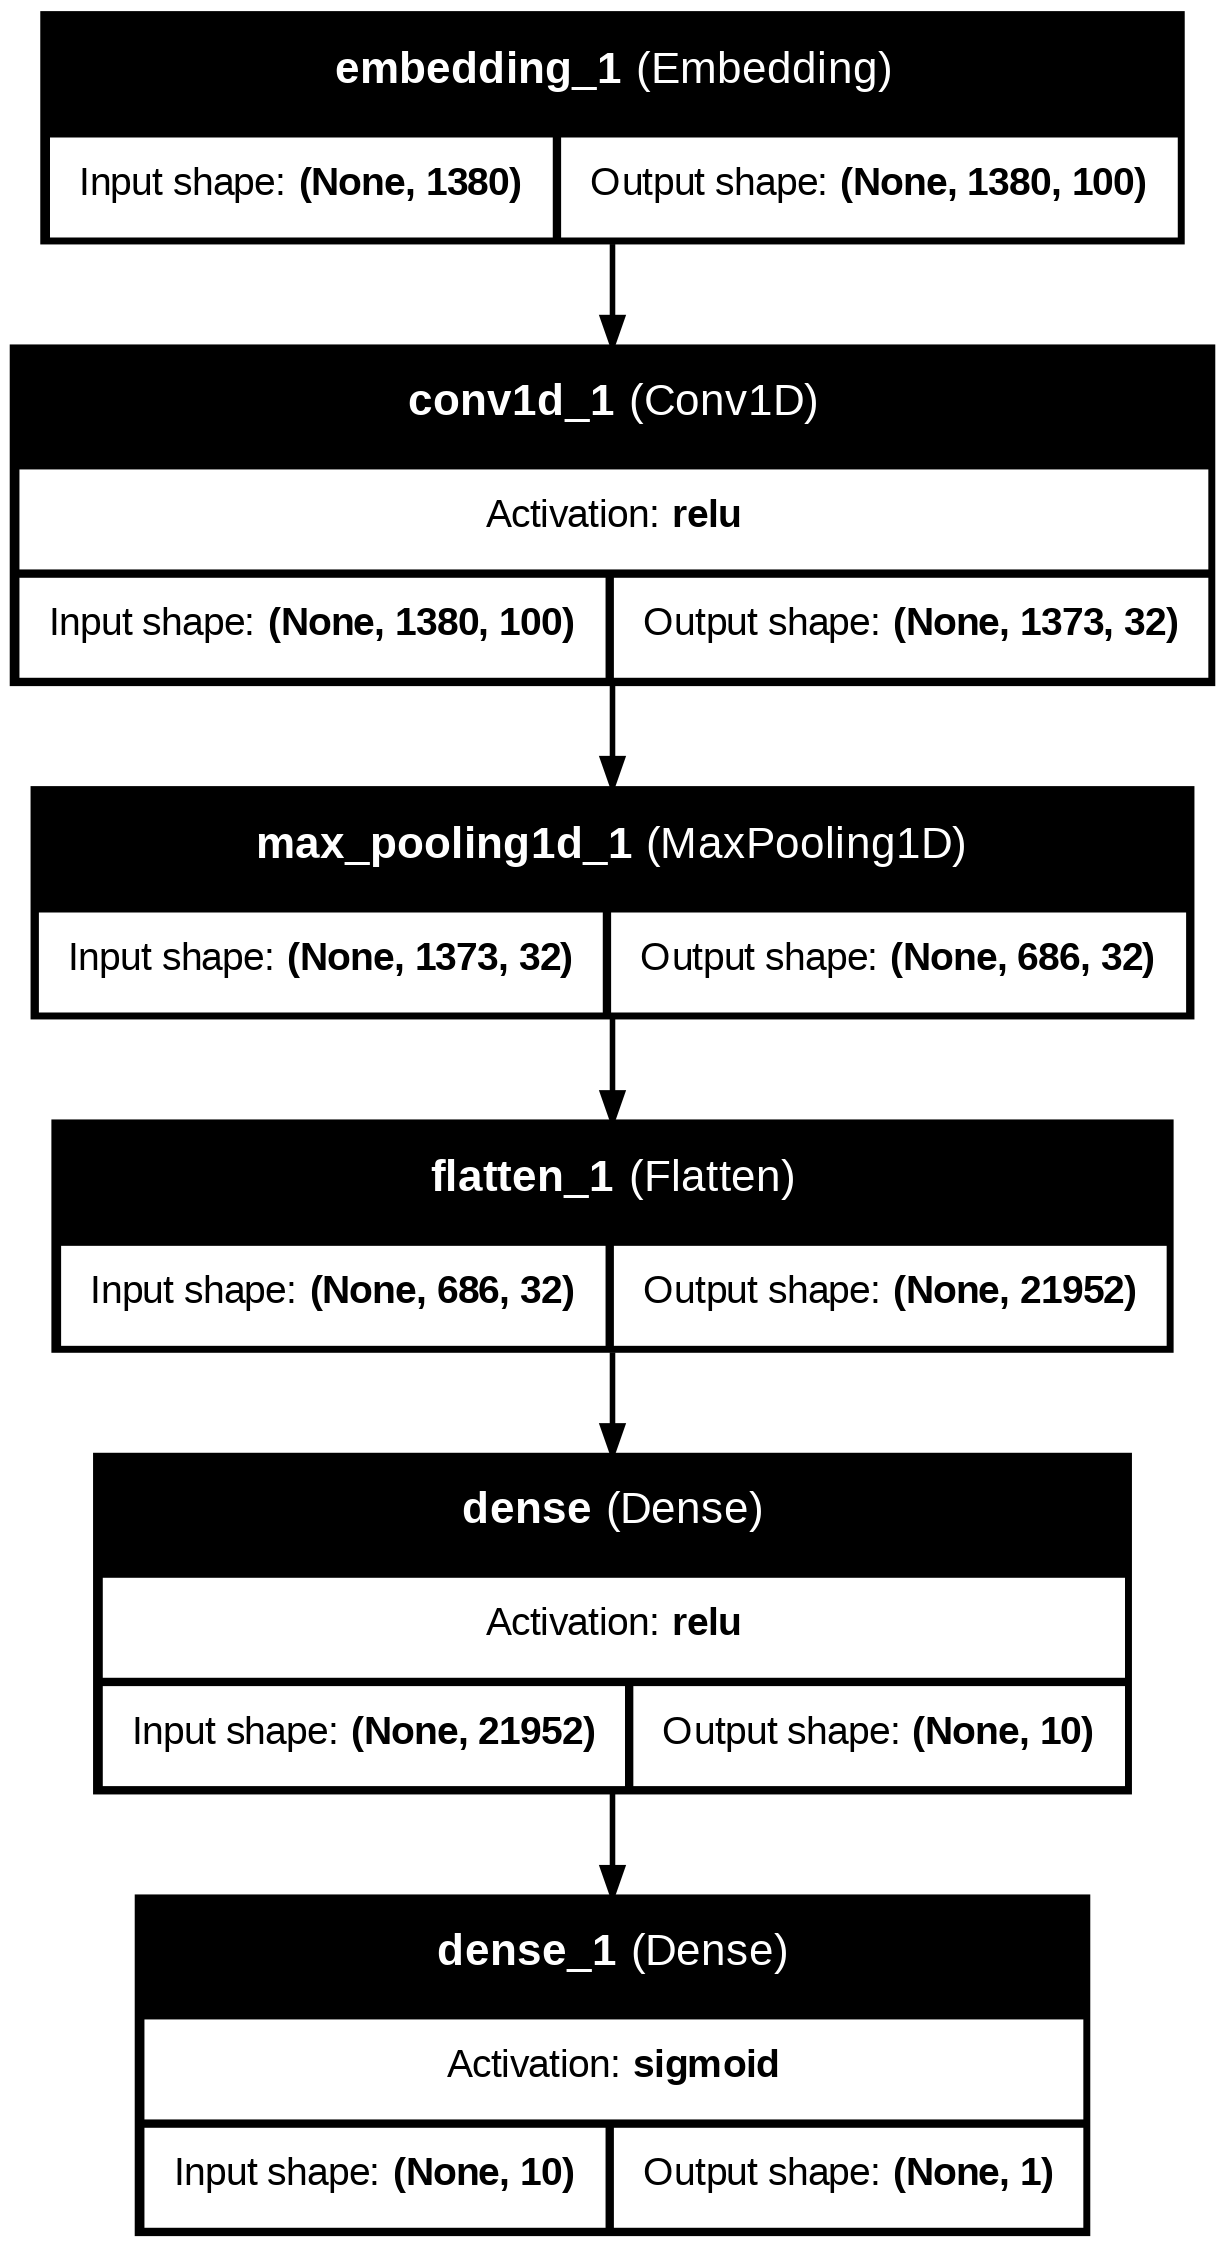

In [78]:
plot_model(model, show_layer_activations=True, show_shapes = True, show_layer_names= True)

In [79]:
# fit network
history = model.fit(Xtrain, np.array(ytrain), validation_data= [Xtest, np.array(ytest)], epochs= 10, batch_size=10)

Epoch 1/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 15s 77ms/step - accuracy: 0.5362 - loss: 0.6924 - val_accuracy: 0.7000 - val_loss: 0.6564
Epoch 2/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 13s 73ms/step - accuracy: 0.8762 - loss: 0.3771 - val_accuracy: 0.8400 - val_loss: 0.3760
Epoch 3/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 15s 83ms/step - accuracy: 1.0000 - loss: 0.0113 - val_accuracy: 0.8650 - val_loss: 0.3711
Epoch 4/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 21s 83ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 0.8900 - val_loss: 0.3803
Epoch 5/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 16s 87ms/step - accuracy: 1.0000 - loss: 7.8151e-04 - val_accuracy: 0.8900 - val_loss: 0.3916
Epoch 6/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 16s 88ms/step - accuracy: 1.0000 - loss: 7.9321e-04 - val_accuracy: 0.8850 - val_loss: 0.4045
Epoch 7/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 16s 91ms/step - accuracy: 1.0000 - loss: 5.4805e-04 - val_accuracy: 0.8850 - val_loss: 0.4135
Epoch 8/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 20s 89ms/step - accuracy: 1.0000 - los

In [80]:
import pandas as pd

In [81]:
df = pd.DataFrame(history.history)

<Axes: >

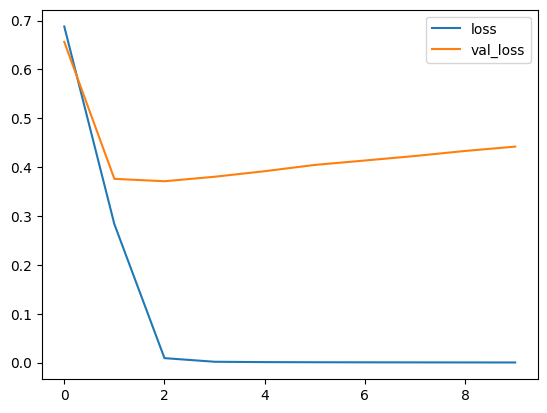

In [82]:
df.plot(y = ['loss', 'val_loss'])


In [ ]:
model.evaluate(x_test, np.array(test_labels), batch_size=1)

In [85]:
# TEST unseen text
text1 = 'Best movie ever! It was great, I will definitely recommend it.'
text2 = "This is a bad movie. Please don't watch it."

In [99]:
def predict_sentiment(text, model=model):
    tokens = clean_doc(text)
    line = ' '.join(tokens)
    # Fix: Use the original max_length used during training
    # max_length = 1381  # This should be the same max_length you used for training

    # Fix: Re-use the original tokenizer used for training
    # tokenizer = create_tokenizer(line)  # This line creates a new tokenizer for every single review.

    encoded = encode_docs(tokenizer, max_length, [line])

    x = model.predict(encoded)
    return (x[0, 0], 'Positive') if x[0, 0] > 0.5 else (1 - x[0, 0], 'Negative')

In [100]:
predict_sentiment(text2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


(0.5855565965175629, 'Negative')

In [101]:
predict_sentiment(text1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


(0.57598525, 'Positive')